In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [4]:
#In this workbook, we will exmine the left tackle position
lt = df[df['Position'] == 'LT']
ltcorr = lt.corr()
ltpos = ltcorr[ltcorr['Overall Rating'] >= 0.5]
ltneg = ltcorr[ltcorr['Overall Rating'] <= -0.5]
print(ltpos['Overall Rating'], ltneg['Overall Rating'])
#These are the significant variables.  We will remove the one with the highest VIF score until they are all below 5

Awareness          0.889339
Impact Blocking    0.768923
Overall Rating     1.000000
Pass Block         0.828145
Run Block          0.656915
Strength           0.653961
Name: Overall Rating, dtype: float64 Series([], Name: Overall Rating, dtype: float64)


In [5]:
ltsig = lt[['Awareness', 'Impact Blocking', 'Pass Block', 'Run Block', 'Stamina', 'Strength']]
X = add_constant(ltsig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#It looks like all of our VIF scores are below 5 so we can move on to statistical testing

const              711.382759
Awareness            2.620742
Impact Blocking      2.378612
Pass Block           1.753398
Run Block            1.824961
Stamina              1.528508
Strength             1.688787
dtype: float64

In [6]:
LT = sm.OLS(lt['Overall Rating'], ltsig).fit()
print(LT.summary())
#It looks like we have a few variables that are not significant
#We will start with removing Run Block and keep removing until all p-values are below 0.005

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.629e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          9.98e-160
Time:                        00:28:50   Log-Likelihood:                -266.97
No. Observations:                 116   AIC:                             545.9
Df Residuals:                     110   BIC:                             562.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.3396      0.019     

In [7]:
ltsig1 = lt[['Awareness', 'Impact Blocking', 'Pass Block','Stamina', 'Strength']]
LT1 = sm.OLS(lt['Overall Rating'], ltsig1).fit()
print(LT1.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.964e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          8.56e-162
Time:                        00:30:31   Log-Likelihood:                -267.22
No. Observations:                 116   AIC:                             544.4
Df Residuals:                     111   BIC:                             558.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.3404      0.019     

In [9]:
ltsig2 = lt[['Awareness', 'Impact Blocking', 'Pass Block','Stamina']]
LT2 = sm.OLS(lt['Overall Rating'], ltsig2).fit()
print(LT2.summary())
#It looks like removing strength made stamina insignificant

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.406e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          2.58e-163
Time:                        00:33:06   Log-Likelihood:                -268.90
No. Observations:                 116   AIC:                             545.8
Df Residuals:                     112   BIC:                             556.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.3371      0.019     

In [11]:
ltsig3 = lt[['Awareness', 'Impact Blocking', 'Pass Block']]
LT3 = sm.OLS(lt['Overall Rating'], ltsig3).fit()
print(LT3.summary())
#It looks like all of our variables are significant now

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.144e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          6.80e-165
Time:                        00:34:37   Log-Likelihood:                -270.59
No. Observations:                 116   AIC:                             547.2
Df Residuals:                     113   BIC:                             555.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.3439      0.019     

In [12]:
def model():
    pv=0.3439*lt['Awareness'] + 0.1651*lt['Impact Blocking'] + 0.4433*lt['Pass Block']
    return pv

In [13]:
lt['Predicted Value'] = model()
lt['Residual'] = lt['Predicted Value'] - lt['Overall Rating']

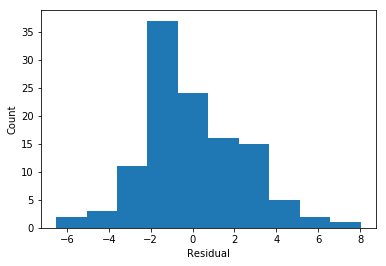

In [14]:
plt.hist(lt['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

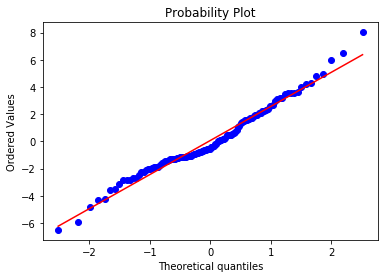

In [15]:
stats.probplot(lt['Residual'], plot=plt)
plt.show()
#There does not appear to be any outliers in the residuals

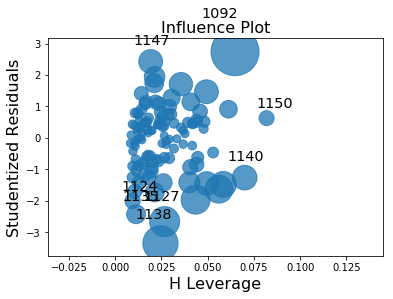

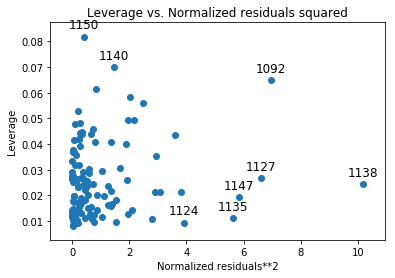

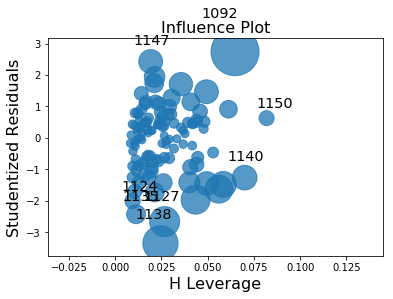

In [16]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(LT3)
influence_plot(LT3)

In [19]:
ltul = lt.drop(df.index[[1092, 1138]])
ltulsig = ltul[['Awareness', 'Impact Blocking', 'Pass Block']]
LT4 = sm.OLS(ltul['Overall Rating'], ltulsig).fit()
print(LT4.summary())
#It looks like all of our variables are still significant and our AIC score dropped 20 points

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.573e+04
Date:                Sat, 21 Jul 2018   Prob (F-statistic):          1.76e-165
Time:                        00:40:29   Log-Likelihood:                -257.45
No. Observations:                 114   AIC:                             520.9
Df Residuals:                     111   BIC:                             529.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Awareness           0.3305      0.018     

In [26]:
def model():
    pv = 0.3305*ltul['Awareness']+ 0.1838*ltul['Impact Blocking'] + 0.4364*ltul['Pass Block']
    return pv

In [27]:
ltul['Predicted Value'] = model()
ltul['Residual'] = ltul['Predicted Value'] - ltul['Overall Rating']

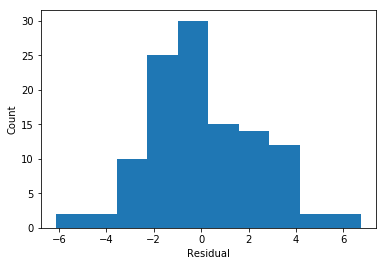

In [28]:
plt.hist(ltul['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

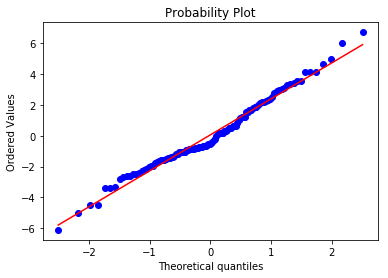

In [29]:
stats.probplot(ltul['Residual'], plot=plt)
plt.show()
#There does not appear to be any outliers in the residuals

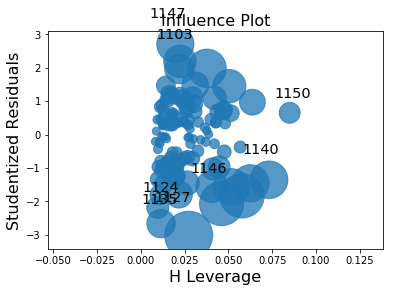

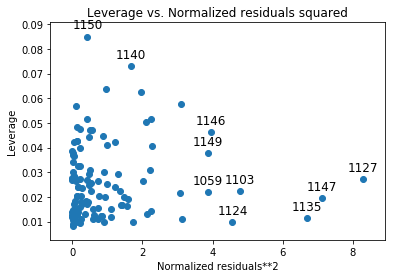

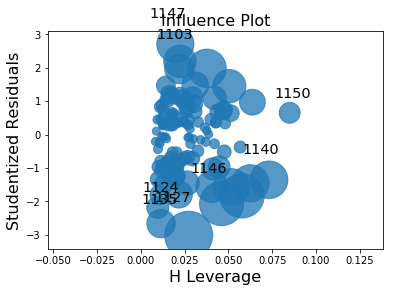

In [30]:
plot_leverage_resid2(LT4)
influence_plot(LT4)
#It doesn't look like there are any leverage points that we need to remove.

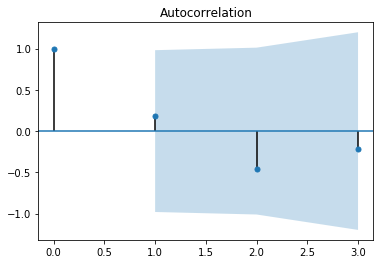

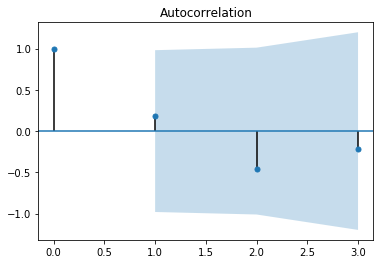

In [32]:
ltulcorr1 = ltul[['Overall Rating', 'Awareness', 'Impact Blocking', 'Pass Block']].corr()
plot_acf(ltulcorr1['Overall Rating'])
#there does not appear to be any autocorrelation looking at the plot below
#There is also a Durbin-Watson correlation of 1.728, which indicates no significant autocoreelation

In [33]:
#Finally, we check for homoskedasticity
het_breuschpagan(ltul['Residual'], ltulsig)
#Due to the low p-values, we can reject the null that there is homoskedasticity in the data

(37.81331252137512,
 6.150968667086457e-09,
 18.364003077091546,
 9.583123863263144e-10)

In [36]:
#Finally, let's test our new model and see how it did
#Now that we have determined that we can use linear regression, let's run some tests and see how accuract our linear 
#regression model is
X_train, X_test, y_train, y_test = train_test_split(ltulsig, ltul['Overall Rating'], test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
ltcv = cross_val_score(reg, ltulsig, ltul['Overall Rating'], cv=5)
ltcv_mean = np.mean(ltcv)
print(ltcv, ltcv_mean)
#It looks like on average this model explained 92.35% in the variation in the data
#It looks like the original was slightly more accuracte

[0.96655018 0.96702628 0.96654359 0.83389382 0.88357227] 0.9235172284198327


In [37]:
ltclean = ltul[['Overall Rating', 'Awareness', 'Impact Blocking', 'Pass Block']]
ltdesc = ltclean.describe()
ltdesc.to_csv('C:\\Users\\tilleymusprime\\Desktop\\ltdesc.csv')